In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import fates_xarray_funcs
from fates_xarray_funcs import monthly_to_annual

In [3]:
cases = {'S0':'f19_0007_trendyS0_39e91e09b5_c2da27fd',
         'S1':'f19_0008_trendyS1_39e91e09b5_c2da27fd',
         'S2':'f19_0010_trendyS2_hybrid_39e91e09b5_c2da27fd',
         'S3':'f19_0009_trendyS3_parta_39e91e09b5_c2da27fd',
         'S3b':'f19_0011_trendyS3_partb_hybrid_39e91e09b5_c2da27fd'}

start_year = {'S0':1701,
         'S1':1701,
         'S2':1901,
         'S3':1701,
         'S3b':1901}

In [4]:
fins_annual = {}
for i, label in enumerate(cases):
    case = cases[label]
    fins_annual.update({label:xr.open_dataset('/global/homes/c/cdkoven/scratch/e3sm_scratch/pm-cpu/'+case+'/run/'+case+'.annual.sofar.nc')})
    fins_annual[label]['time'] = np.arange(len(fins_annual[label]['time'])) + start_year[label]

In [5]:
fins_monthly = {}
for i, label in enumerate(cases):
    case = cases[label]
    fins_monthly.update({label:xr.open_dataset('/global/homes/c/cdkoven/scratch/e3sm_scratch/pm-cpu/'+case+'/run/'+case+'.monthly.sofar.nc')})
    fins_monthly[label]['time'] = np.arange(len(fins_monthly[label]['time']))/12. + start_year[label]
                                       

In [13]:
area_elmvars = fins_annual['S0']['area'] * 1e6 * fins_annual['S0']['landfrac']  ### area in m^2
area_fatesvars = fins_annual['S0']['area'] * 1e6 * fins_annual['S0']['landfrac'] * fins_annual['S0']['FATES_FRACTION'].isel(time=0)  ### area in m^2

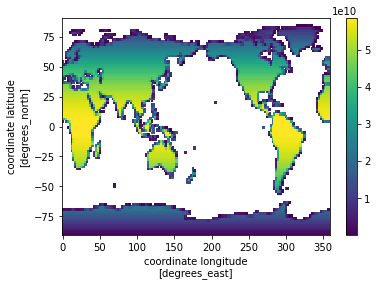

In [23]:
#fins_annual['S0']['landfrac'].plot()
#fins_annual['S0']['FATES_FRACTION'].isel(time=0).plot()
area_fatesvars.plot()
#area_elmvars.plot()

(270.0, 440.0)

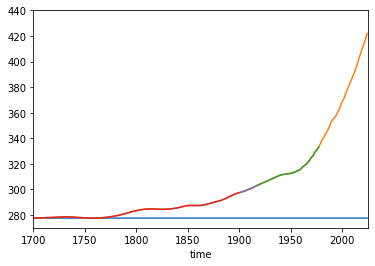

In [6]:
(1e6*fins_annual['S0']['PCO2'].mean(dim=['lat','lon'])/fins_annual['S0']['PBOT'].mean(dim=['lat','lon'])).plot()
(1e6*fins_annual['S1']['PCO2'].mean(dim=['lat','lon'])/fins_annual['S1']['PBOT'].mean(dim=['lat','lon'])).plot()
(1e6*fins_annual['S2']['PCO2'].mean(dim=['lat','lon'])/fins_annual['S2']['PBOT'].mean(dim=['lat','lon'])).plot()
(1e6*fins_annual['S3']['PCO2'].mean(dim=['lat','lon'])/fins_annual['S3']['PBOT'].mean(dim=['lat','lon'])).plot()
(1e6*fins_annual['S3b']['PCO2'].mean(dim=['lat','lon'])/fins_annual['S3b']['PBOT'].mean(dim=['lat','lon'])).plot()

plt.xlim(1700,2025)
plt.ylim(270,440)

In [7]:
co2file = xr.open_dataset('/global/cfs/cdirs/e3sm/inputdata/atm/datm7/TRENDY2025/CO2field/fco2_datm_global_simyr_1700-2024_TRENDY_c250625.nc', decode_times=False)

(270.0, 440.0)

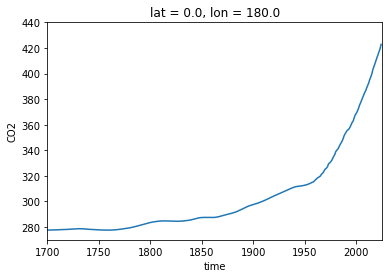

In [8]:
co2file['time'] = np.arange(len(co2file['time']))+1700.
co2file['CO2'].plot()
plt.xlim(1700,2025)
plt.ylim(270,440)

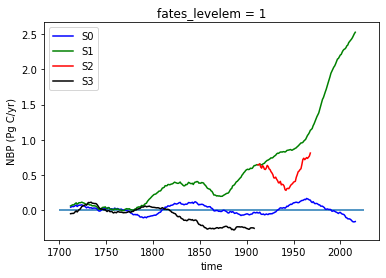

In [29]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['NBP'] * area_elmvars + fins_monthly['S0']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0) * area_fatesvars *1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['NBP'] * area_elmvars + fins_monthly['S1']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0) * area_fatesvars *1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S2']['NBP'] * area_elmvars + fins_monthly['S2']['FATES_SEEDS_IN_EXTERN_EL'].isel(fates_levelem=0) * area_fatesvars *1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Red', linestyle='solid', label='S2')
(fates_xarray_funcs.monthly_to_annual((xr.concat((fins_monthly['S3']['NBP'],fins_monthly['S3b']['NBP']),dim='time')* area_elmvars + xr.concat((fins_monthly['S3']['FATES_SEEDS_IN_EXTERN_EL'],fins_monthly['S3b']['FATES_SEEDS_IN_EXTERN_EL']),dim='time').isel(fates_levelem=0)* area_fatesvars *1e3))* 86400 * 365 * 1e-15 ).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Black', linestyle='solid', label='S3')
plt.ylabel('NBP (Pg C/yr)')
plt.hlines(0,xmin=1700, xmax=2025)
plt.legend()

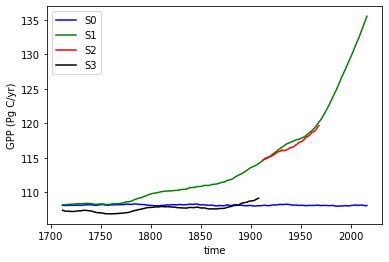

In [26]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['FATES_GPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['FATES_GPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S2']['FATES_GPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Red', linestyle='solid', label='S2')
(fates_xarray_funcs.monthly_to_annual((xr.concat((fins_monthly['S3']['FATES_GPP'],fins_monthly['S3b']['FATES_GPP']),dim='time')* area_fatesvars * 1e3))* 86400 * 365 * 1e-15 ).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Black', linestyle='solid', label='S3')
plt.ylabel('GPP (Pg C/yr)')

plt.legend()

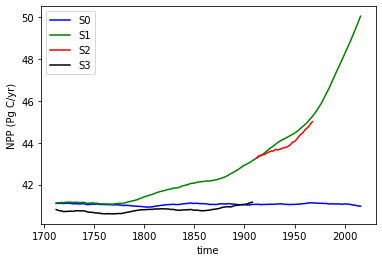

In [27]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['FATES_NPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['FATES_NPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S2']['FATES_NPP'] * area_fatesvars * 1e3))* 86400 * 365 * 1e-15).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Red', linestyle='solid', label='S2')
(fates_xarray_funcs.monthly_to_annual((xr.concat((fins_monthly['S3']['FATES_NPP'],fins_monthly['S3b']['FATES_NPP']),dim='time')* area_fatesvars * 1e3))* 86400 * 365 * 1e-15 ).sum(dim=('lat','lon')).rolling(time=20, center=True).mean().plot(color='Black', linestyle='solid', label='S3')
plt.ylabel('NPP (Pg C/yr)')

plt.legend()

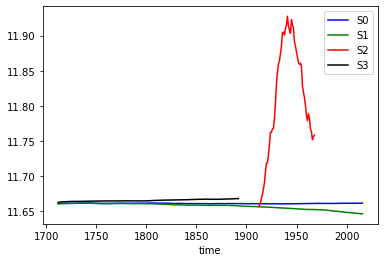

In [31]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['TSA']-273.15) * fins_annual['S0']['area']).sum(dim=('lat','lon')) / fins_annual['S0']['area'].sum(dim=('lat','lon'))).rolling(time=20, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['TSA']-273.15) * fins_annual['S1']['area']).sum(dim=('lat','lon')) / fins_annual['S1']['area'].sum(dim=('lat','lon'))).rolling(time=20, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S2']['TSA']-273.15) * fins_annual['S2']['area']).sum(dim=('lat','lon')) / fins_annual['S2']['area'].sum(dim=('lat','lon'))).rolling(time=20, center=True).mean().plot(color='Red', linestyle='solid', label='S2')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S3']['TSA']-273.15) * fins_annual['S3']['area']).sum(dim=('lat','lon')) / fins_annual['S3']['area'].sum(dim=('lat','lon'))).rolling(time=20, center=True).mean().plot(color='Black', linestyle='solid', label='S3')

#plt.hlines(0,xmin=1700, xmax=†2025)
plt.legend()

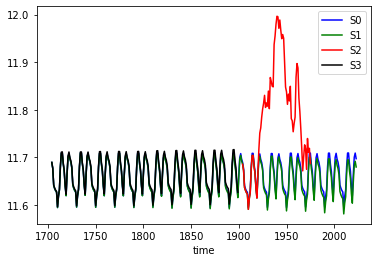

In [30]:
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S0']['TSA']-273.15) * fins_annual['S0']['area']).sum(dim=('lat','lon')) / fins_annual['S0']['area'].sum(dim=('lat','lon'))).rolling(time=5, center=True).mean().plot(color='Blue', linestyle='solid', label='S0')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S1']['TSA']-273.15) * fins_annual['S1']['area']).sum(dim=('lat','lon')) / fins_annual['S1']['area'].sum(dim=('lat','lon'))).rolling(time=5, center=True).mean().plot(color='Green', linestyle='solid', label='S1')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S2']['TSA']-273.15) * fins_annual['S2']['area']).sum(dim=('lat','lon')) / fins_annual['S2']['area'].sum(dim=('lat','lon'))).rolling(time=5, center=True).mean().plot(color='Red', linestyle='solid', label='S2')
(fates_xarray_funcs.monthly_to_annual((fins_monthly['S3']['TSA']-273.15) * fins_annual['S3']['area']).sum(dim=('lat','lon')) / fins_annual['S3']['area'].sum(dim=('lat','lon'))).rolling(time=5, center=True).mean().plot(color='Black', linestyle='solid', label='S3')

#plt.hlines(0,xmin=1700, xmax=†2025)
plt.legend()